In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"C:\Users\Hp\Downloads\brain_stroke (1).csv")
dataset

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hp\\Downloads\\brain_stroke (1).csv'

In [3]:
 dataset["stroke"].value_counts()

NameError: name 'dataset' is not defined

In [4]:
x=dataset.iloc[:,[1,2,3,7,8]].values
y=dataset.iloc[:,-1].values

NameError: name 'dataset' is not defined

# imbalancing over sampling

In [4]:
from imblearn.over_sampling import RandomOverSampler
r1=RandomOverSampler()
x_data,y_data=r1.fit_resample(x,y)

In [5]:
dataset["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [6]:
from collections import Counter
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


In [7]:
x=dataset.iloc[:,[1,2,3,4,7,8]].values
y=dataset.iloc[:,-1].values

# model train

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=99)

In [9]:
print(Counter(y_train))

Counter({1: 3786, 0: 3786})


# Algoritham

In [10]:
from sklearn.linear_model import LogisticRegression
l2=LogisticRegression()
l2.fit(x_train,y_train)

LogisticRegression()

# Prediction

In [11]:
y_pred=l2.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
print("Train Accuracy:", l2.score(x_train,y_train))
print("Test Accuracy:", l2.score(x_test,y_pred))

Train Accuracy: 0.7716587427363972
Test Accuracy: 1.0


In [13]:
from sklearn.metrics import accuracy_score
l=accuracy_score(y_test,y_pred)*100
print(l)

78.19429778247095


# Confusion Matrix

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
cf=confusion_matrix(y_test,y_pred)*100
print(cf)

[[70400 24300]
 [17000 77700]]


<AxesSubplot:xlabel='stroke'>

<Figure size 1080x1080 with 0 Axes>

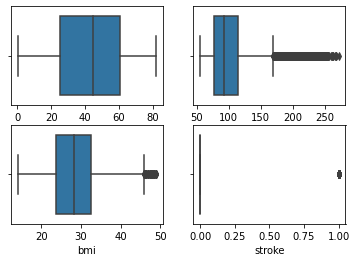

In [15]:
plt.figure(figsize=(15,15))
fig,axs=plt.subplots(ncols=2,nrows=2)
sns.boxplot(x="age",ax=axs[0,0],data=dataset)
sns.boxplot(x="avg_glucose_level",ax=axs[0,1],data=dataset)
sns.boxplot(x="bmi",ax=axs[1,0],data=dataset)
sns.boxplot(x="stroke",ax=axs[1,1],data=dataset)

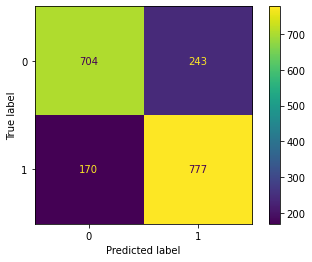

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#y_test=np.random.binomial(1,.9,size=500)
#vc_pred=np.random.binomial(1,.9,size=500)
Confusion_Matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(Confusion_Matrix)
#cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
cm_display.plot()
plt.show()


# Precision

In [17]:
Precision=metrics.precision_score(y_test,y_pred)*100
Precision

76.17647058823529

# Sensitivity / recall

In [18]:
Sensitivity=metrics.recall_score(y_test,y_pred)*100
Sensitivity

82.04857444561775

# F1_score

In [19]:
F1_score=metrics.f1_score(y_test,y_pred)*100
F1_score

79.00355871886121

In [26]:
#all scores show in one tabel
from sklearn.metrics  import confusion_matrix,classification_report
print(classification_report,(y_test,y_pred))

<function classification_report at 0x0A1CFE80> (array([0, 1, 0, ..., 0, 1, 0], dtype=int64), array([0, 1, 0, ..., 0, 1, 0], dtype=int64))
